# <center>Engineering Placements Prediction

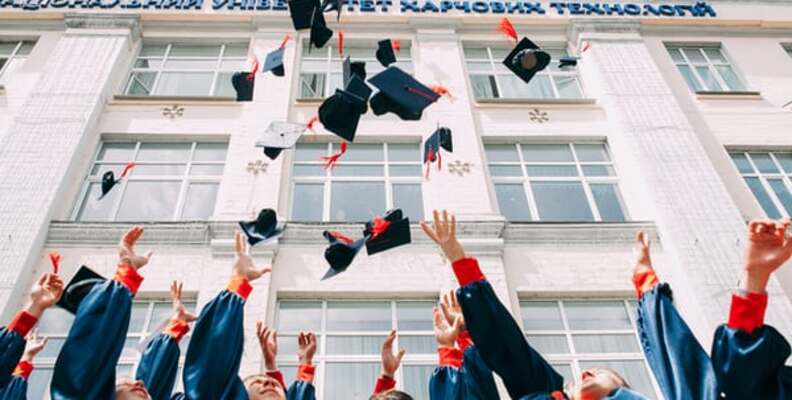

### Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("collegePlace.csv")

In [3]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


### Exploratory Data Analysis

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2966.0,21.485840,1.324933,19.0,21.0,21.0,22.0,30.0
Internships,2966.0,0.703641,0.740197,0.0,0.0,1.0,1.0,3.0
CGPA,2966.0,7.073837,0.967748,5.0,6.0,7.0,8.0,9.0
Hostel,2966.0,0.269049,0.443540,0.0,0.0,0.0,1.0,1.0
HistoryOfBacklogs,2966.0,0.192178,0.394079,0.0,0.0,0.0,0.0,1.0
PlacedOrNot,2966.0,0.552596,0.497310,0.0,0.0,1.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [6]:
df.shape

(2966, 8)

## Univariate Analysis

### Histogram

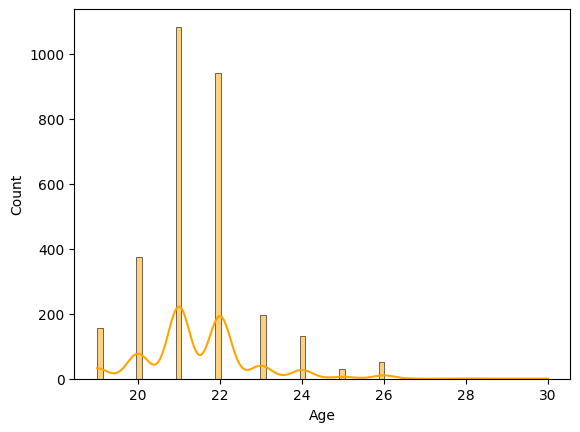

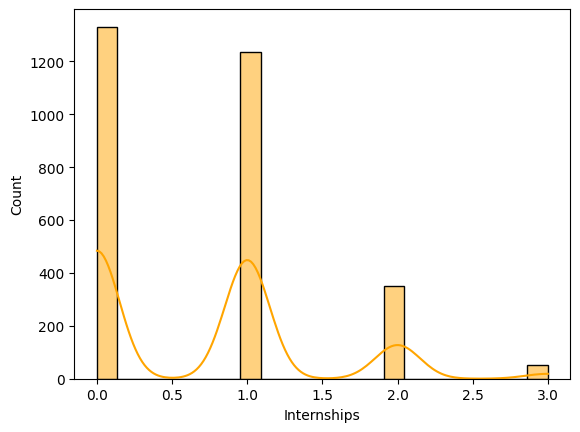

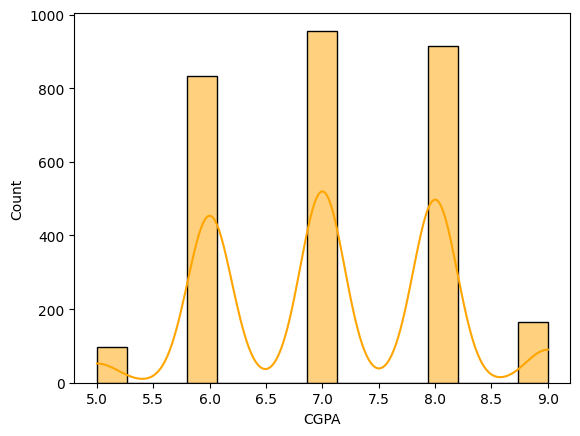

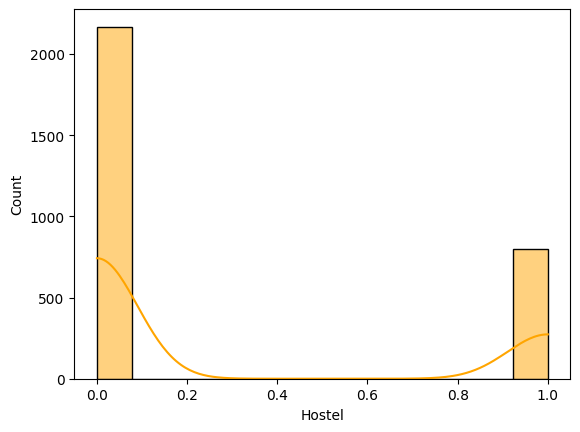

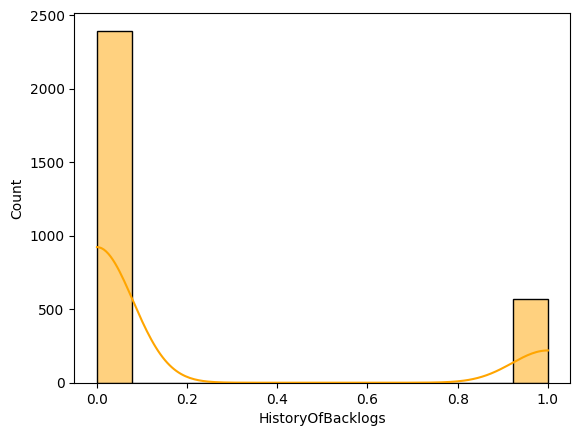

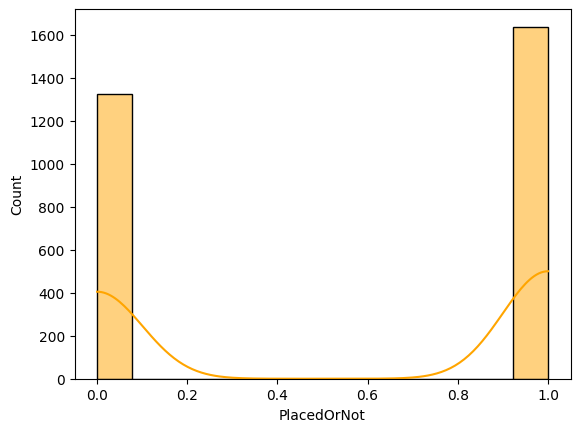

In [7]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.histplot(df, x=df[column], kde=True, color="orange")
        plt.show()

### Box plot

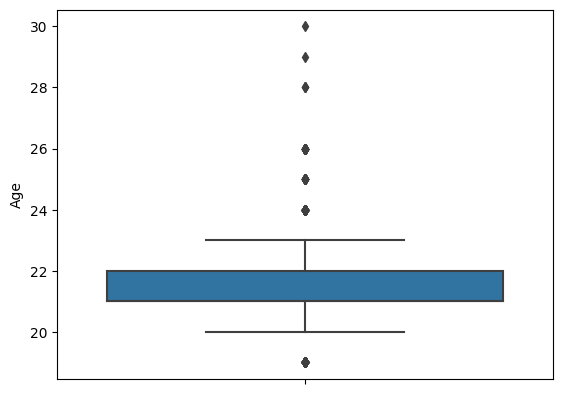

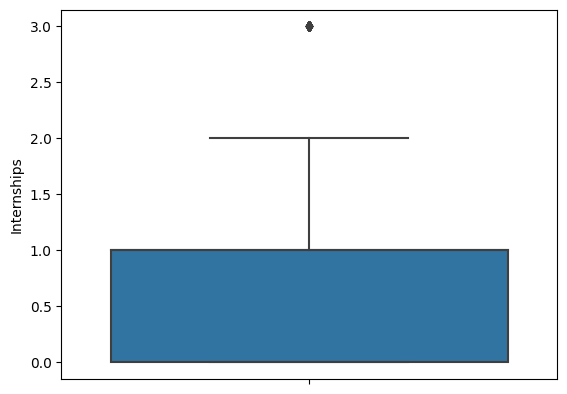

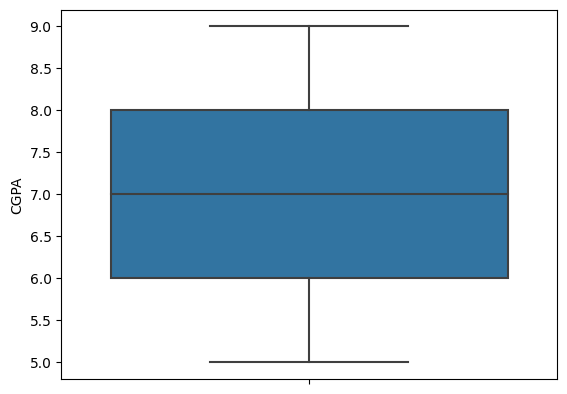

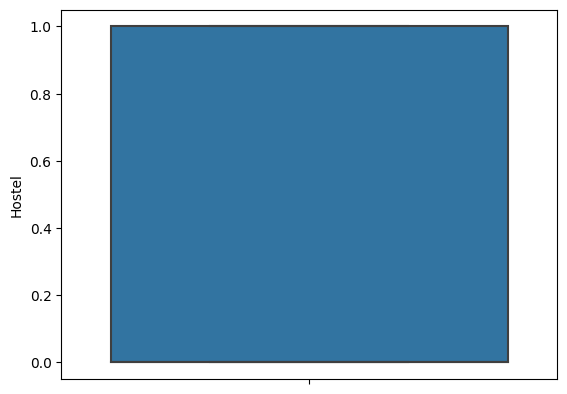

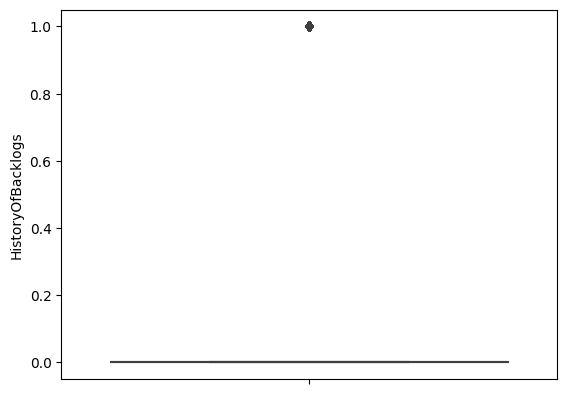

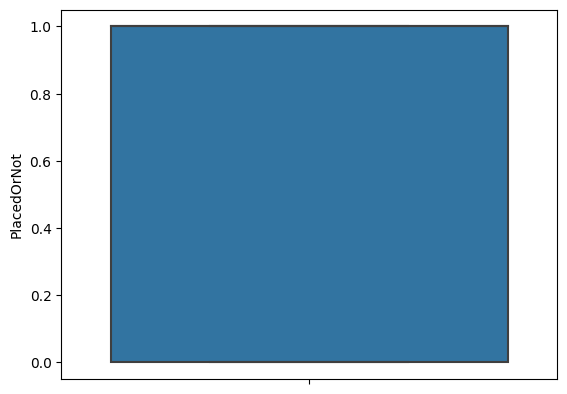

In [8]:
for column in df.columns:
    if df[column].dtype !="object":
        sns.boxplot(y=df[column])
        plt.show()

## Multivariate Analysis
### Pie chart

In [9]:
who_placed=df.groupby(['Stream'])['PlacedOrNot'].sum()

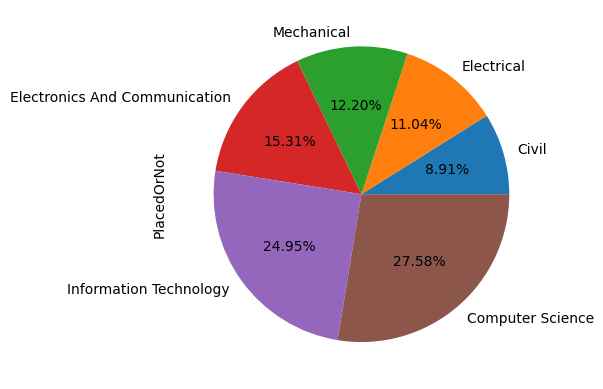

In [10]:
who_placed.sort_values(ascending=True).plot.pie(autopct='%.2f%%');

### Bar chart

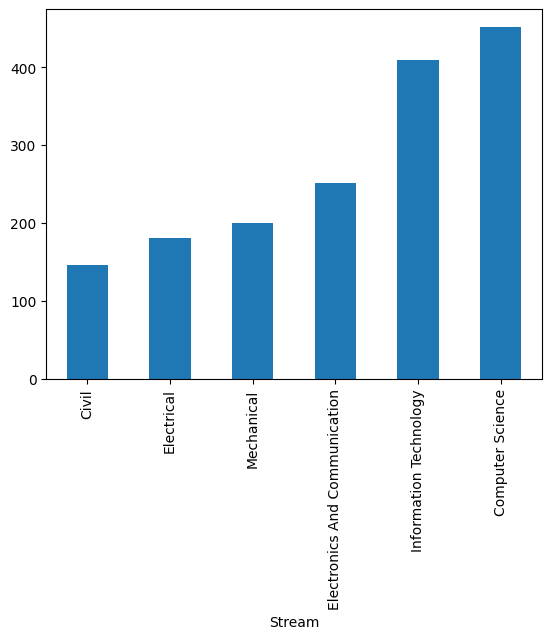

In [11]:
who_placed.sort_values(ascending=True).plot.bar();

### Removing outliers

In [12]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [13]:
for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

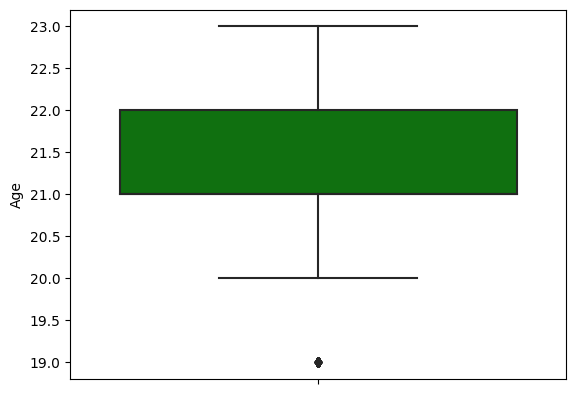

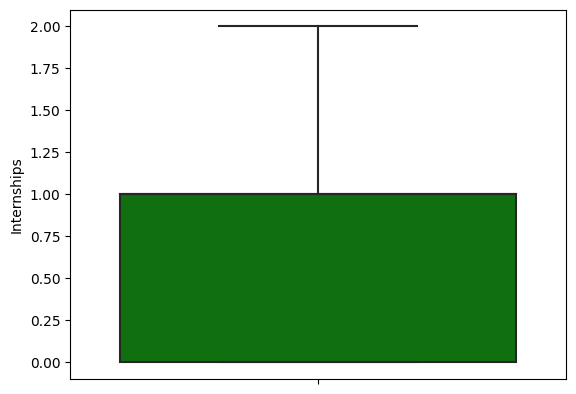

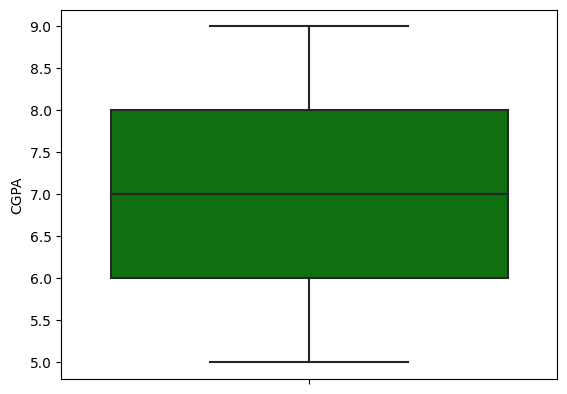

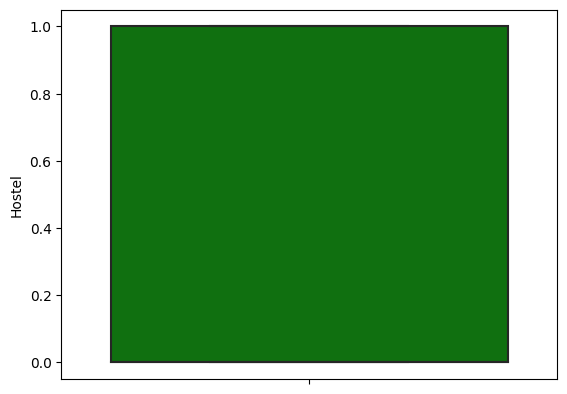

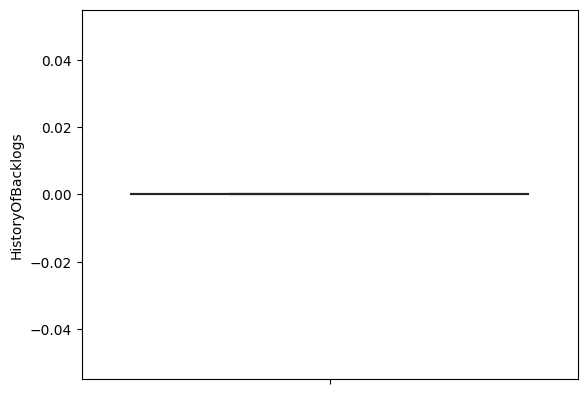

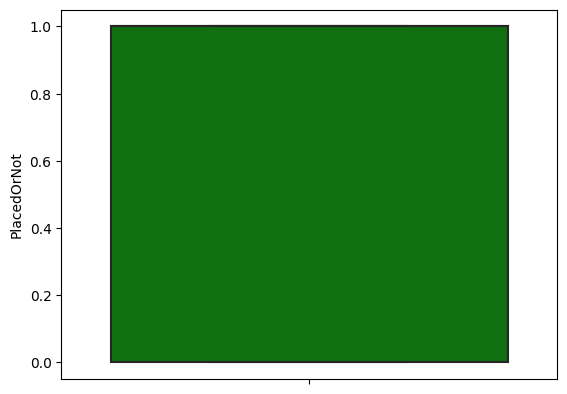

In [14]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column], color="green")
        plt.show()

In [15]:
null_prcent = df.isnull().mean()*100
null_prcent

Age                   7.248820
Gender                0.000000
Stream                0.000000
Internships           1.719488
CGPA                  0.000000
Hostel                0.000000
HistoryOfBacklogs    19.217802
PlacedOrNot           0.000000
dtype: float64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().mean()*100

Age                  0.0
Gender               0.0
Stream               0.0
Internships          0.0
CGPA                 0.0
Hostel               0.0
HistoryOfBacklogs    0.0
PlacedOrNot          0.0
dtype: float64

### Label encoding the categorical variables

In [18]:
le=LabelEncoder()

In [19]:
df["Gender"]=le.fit_transform(df.Gender)
df["Stream"]=le.fit_transform(df.Stream)

In [20]:
df.sample(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1375,22.0,1,4,1.0,6.0,1.0,0.0,0.0
776,21.0,1,2,1.0,6.0,0.0,0.0,0.0
432,21.0,1,0,0.0,8.0,0.0,0.0,1.0
1684,20.0,1,5,0.0,6.0,1.0,0.0,0.0
2400,22.0,1,3,1.0,6.0,0.0,0.0,0.0
688,22.0,1,5,0.0,8.0,1.0,0.0,1.0
1048,21.0,1,1,2.0,7.0,0.0,0.0,1.0
66,22.0,1,1,1.0,9.0,0.0,0.0,1.0
2251,19.0,1,4,0.0,6.0,0.0,0.0,0.0
52,21.0,0,1,1.0,8.0,1.0,0.0,1.0


### Plotting heat map for finding correlation

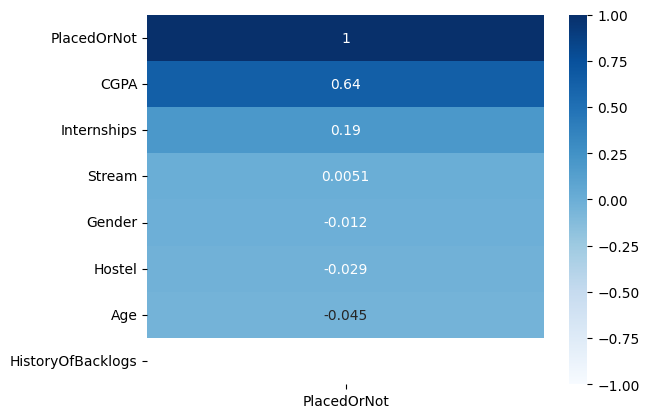

In [21]:
sns.heatmap(df.corr()[["PlacedOrNot"]].sort_values(by="PlacedOrNot", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

#### CGPA,Internship and stream are selected as x variables
#### Target variable y is placedornot

In [22]:
x = df[['CGPA','Internships','Stream']].values

In [23]:
y= df[['PlacedOrNot']].values

In [24]:
sc=StandardScaler()

In [25]:
x= sc.fit_transform(x)

In [26]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    "SVC" : SVC(probability=True)
}

In [27]:
for name, model in models.items():
    scores = cross_val_score(model, x,y,cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    average_score= np.mean(scores)
    print("average_score: ",average_score)
    print("*"*100)

cross validation model : LogisticRegression
average_score:  0.784994344602237
****************************************************************************************************
cross validation model : DecisionTreeClassifier
average_score:  0.8876900842025888
****************************************************************************************************
cross validation model : RandomForestClassifier
average_score:  0.8881487997989191
****************************************************************************************************
cross validation model : KNeighborsClassifier
average_score:  0.8413702819320514
****************************************************************************************************
cross validation model : SVC
average_score:  0.8803548238448325
****************************************************************************************************


### RandomForestClassifier has highest average score
### Splitting data to train and test set

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

model trained with RandomForestClassifier()
Model accuracy on train is::  0.8927752293577982
Model accuracy on test is::  0.8741418764302059
confusion_matrix train is::  [[787  28]
 [159 770]]
confusion_matrix test is::  [[193   8]
 [ 47 189]]
Wrong Predictions made: 96237 / 190969


In [31]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [32]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,1,0
1,1,1
2,0,0
3,0,0
4,1,1


### Receiver Operating Characteristic Curve

Model used is::  RandomForestClassifier()


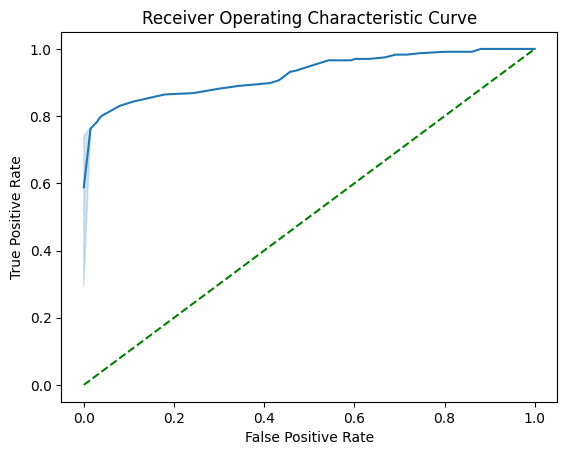

In [33]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()